In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv("letter-recognition.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
df.columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar','x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvy']

In [5]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('letter', axis=1), df['letter'], test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [7]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

results = []

for idx, (X_train, X_test, y_train, y_test) in enumerate(samples):
    grid = GridSearchCV(SVC(), param_grid, cv=3, verbose=0)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    best_params = grid.best_params_
    results.append({
        'Sample': f'S{idx+1}',
        'Best Accuracy': acc,
        'Best Params': best_params
    })

In [13]:
for r in results:
    params = r['Best Params']
    r['Kernel'] = params.get('kernel')
    r['C'] = params.get('C')
    r['Gamma'] = params.get('gamma')

df_results= pd.DataFrame(results)
df_results = df_results[['Sample', 'Best Accuracy', 'Kernel', 'C', 'Gamma']]
print(df_results)

  Sample  Best Accuracy Kernel   C Gamma
0     S1       0.978500    rbf  10  auto
1     S2       0.974167    rbf  10  auto
2     S3       0.975833    rbf  10  auto
3     S4       0.977833    rbf  10  auto
4     S5       0.970833    rbf  10  auto
5     S6       0.978333    rbf  10  auto
6     S7       0.974667    rbf  10  auto
7     S8       0.975333    rbf  10  auto
8     S9       0.975000    rbf  10  auto
9    S10       0.976333    rbf  10  auto


In [9]:
import random
import matplotlib.pyplot as plt

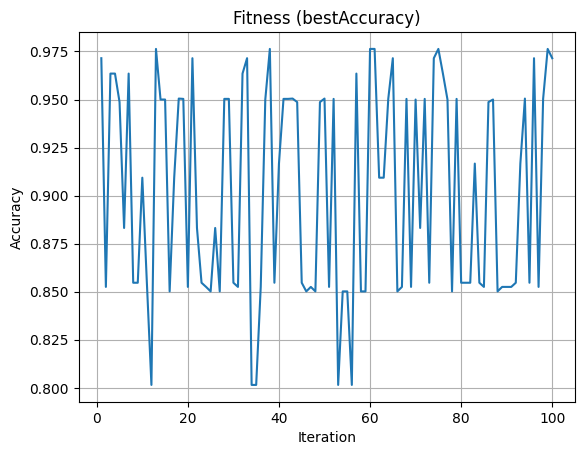

In [10]:
accuracies = []
for i in range(100):
    params = {
        'kernel': random.choice(['linear', 'rbf', 'poly']),
        'C': random.choice([0.1, 1, 10]),
        'gamma': random.choice(['scale', 'auto'])
    }
    model = SVC(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.plot(range(1, 101), accuracies)
plt.title('Fitness (bestAccuracy)')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid()
plt.show()